**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /data/reddylab/Kuei 
WORK DIRECTORY:     /data/reddylab/Kuei/out 
CODE DIRECTORY:     /data/reddylab/Kuei/code 
PATH OF SOURCE:     /data/reddylab/Kuei/source 
PATH OF EXECUTABLE: /data/reddylab/Kuei/bin 
PATH OF ANNOTATION: /data/reddylab/Kuei/annotation 
PATH OF PROJECT:    /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS:    /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 


**Check data**

In [3]:
fdiry = file.path(FD_RES, "region", "annotation_genehancer")
print(dir(fdiry))

 [1] "geneHancerInteractions_hg38_chr11.tsv"             
 [2] "geneHancerInteractions_hg38_chr8.tsv"              
 [3] "geneHancerInteractions_hg38_chrX.tsv"              
 [4] "geneHancerInteractionsDoubleElite_hg38_chr11.tsv"  
 [5] "geneHancerInteractionsDoubleElite_hg38_chr8.tsv"   
 [6] "geneHancerInteractionsDoubleElite_hg38_chrX.tsv"   
 [7] "geneHancerRegElements_hg38_chr11.bed"              
 [8] "geneHancerRegElements_hg38_chr11.tsv"              
 [9] "geneHancerRegElements_hg38_chr8.bed"               
[10] "geneHancerRegElements_hg38_chr8.tsv"               
[11] "geneHancerRegElements_hg38_chrX.bed"               
[12] "geneHancerRegElements_hg38_chrX.tsv"               
[13] "geneHancerRegElements_hg38.bed"                    
[14] "geneHancerRegElementsDoubleElite_hg38_chr11.bed"   
[15] "geneHancerRegElementsDoubleElite_hg38_chr11.tsv"   
[16] "geneHancerRegElementsDoubleElite_hg38_chr8.bed"    
[17] "geneHancerRegElementsDoubleElite_hg38_chr8.tsv"    
[18] "geneHanc

## Import data

In [4]:
###
fdiry = file.path(FD_RES, "region", "annotation_genehancer")
fname = "geneHancerRegElements_hg38_chrX.tsv"
fpath = file.path(fdiry, fname)

###
dat = read_tsv(fpath, show_col_types = FALSE)
colnames(dat)[1] = "chrom"

###
dat_ghancer = dat
print(dim(dat))
head(dat)

[1] 5794   12


chrom,chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,evidenceSources,elementType,eliteness
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chrX,13390,14928,GH0XJ000013,137,.,13390,14928,160160160,Ensembl,Enhancer,-
chrX,17474,20600,GH0XJ000017,99,.,17474,20600,160160160,Ensembl,Enhancer,-
chrX,94800,95400,GH0XJ000094,1,.,94800,95400,192192192,Ensembl,Enhancer,-
chrX,225927,227643,GH0XJ000225,1,.,225927,227643,192192192,Ensembl,Enhancer,-
chrX,230148,233000,GH0XJ000230,1,.,230148,233000,192192192,Ensembl,Enhancer,-
chrX,249800,251200,GH0XJ000249,82,.,249800,251200,160160160,Ensembl,Enhancer,-


In [10]:
###
fdiry = file.path(FD_RES, "region", "annotation_genehancer")
fname = "geneHancerInteractions_hg38_chrX.tsv"
fpath = file.path(fdiry, fname)

###
dat = read_tsv(fpath, show_col_types = FALSE)
colnames(dat)[1] = "chrom"

###
dat_ghancer_int = dat
print(dim(dat))
head(dat)

[1] 14260    18


chrom,chromStart,chromEnd,name,score,value,geneAssociationMethods,color,geneHancerChrom,geneHancerStart,geneHancerEnd,geneHancerIdentifier,geneHancerStrand,geneChrom,geneStart,geneEnd,geneName,geneStrand
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
chrX,13390,253743,ENSG00000228572/GH0XJ000013,2,0.04,Distance,"77,190,238",chrX,13390,14928,GH0XJ000013,.,chrX,253742,253743,ENSG00000228572,+
chrX,17474,253743,ENSG00000228572/GH0XJ000017,2,0.04,Distance,"77,190,238",chrX,17474,20600,GH0XJ000017,.,chrX,253742,253743,ENSG00000228572,+
chrX,94800,253743,ENSG00000228572/GH0XJ000094,2,0.02,Distance,"77,190,238",chrX,94800,95400,GH0XJ000094,.,chrX,253742,253743,ENSG00000228572,+
chrX,225927,253743,ENSG00000228572/GH0XJ000225,2,0.06,Distance,"77,190,238",chrX,225927,227643,GH0XJ000225,.,chrX,253742,253743,ENSG00000228572,+
chrX,230148,253743,ENSG00000228572/GH0XJ000230,2,0.07,Distance,"77,190,238",chrX,230148,233000,GH0XJ000230,.,chrX,253742,253743,ENSG00000228572,+
chrX,249800,253743,ENSG00000228572/GH0XJ000249,2,0.34,Distance,"77,190,238",chrX,249800,251200,GH0XJ000249,.,chrX,253742,253743,ENSG00000228572,+


In [19]:
###
fdiry = file.path(FD_RES, "region", "KS91_K562_ASTARRseq_peak_macs")
fname = "KS91_K562_hg38_ASTARRseq_Input.all_reps.masked.union_narrowPeak.q5.geneHancerRegElements_hg38.bed.gz"
fpath = file.path(fdiry, fname)

###
cnames = c("Chrom", "Start", "End", colnames(dat_ghancer), "Overlap")
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat = dat %>% mutate(Peak = paste(Chrom, Start, End, sep="_"))

###
dat_ghancer_reg = dat
print(dim(dat))
head(dat)

[1] 12513    17


Chrom,Start,End,chrom,chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,evidenceSources,elementType,eliteness,Overlap,Peak
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
chr11,191906,192504,chr11,191300,192770,GH11J000191,296,.,191300,192770,959595,"ENCODE(Z-Lab),Ensembl",Enhancer,Elite,598,chr11_191906_192504
chr11,206698,209020,chr11,205714,211708,GH11J000205,636,.,205714,211708,20400,"ENCODE(Z-Lab),EPDnew,Ensembl,dbSUPER",Promoter/Enhancer,Elite,2322,chr11_206698_209020
chr11,215373,216102,chr11,215128,218399,GH11J000215,140,.,215128,218399,160160160,dbSUPER,Enhancer,-,729,chr11_215373_216102
chr11,216448,216874,chr11,215128,218399,GH11J000215,140,.,215128,218399,160160160,dbSUPER,Enhancer,-,426,chr11_216448_216874
chr11,217600,218132,chr11,215128,218399,GH11J000215,140,.,215128,218399,160160160,dbSUPER,Enhancer,-,532,chr11_217600_218132
chr11,235755,237639,chr11,234782,238316,GH11J000234,632,.,234782,238316,20400,"ENCODE(Z-Lab),EPDnew,Ensembl,dbSUPER",Promoter/Enhancer,Elite,1884,chr11_235755_237639


## GATA1

In [20]:
dat = dat_ghancer_int
dat = dat %>% dplyr::filter(geneName == "GATA1")

print(dim(dat))
dat

[1]  7 18


chrom,chromStart,chromEnd,name,score,value,geneAssociationMethods,color,geneHancerChrom,geneHancerStart,geneHancerEnd,geneHancerIdentifier,geneHancerStrand,geneChrom,geneStart,geneEnd,geneName,geneStrand
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
chrX,48776467,48786554,GATA1/GH0XJ048776,2,0.26,Distance,"126,47,142",chrX,48776467,48777731,GH0XJ048776,.,chrX,48786553,48786554,GATA1,+
chrX,48782533,48786554,GATA1/GH0XJ048782,2,0.83,Distance,"126,47,142",chrX,48782533,48783734,GH0XJ048782,.,chrX,48786553,48786554,GATA1,+
chrX,48785470,48788954,GATA1/GH0XJ048785,491,1205.94,"eRNA_co-expression,Distance","126,47,142",chrX,48785470,48788954,GH0XJ048785,.,chrX,48786553,48786554,GATA1,+
chrX,48786553,49157200,GATA1/GH0XJ049154,3,2.64,eRNA_co-expression,"126,47,142",chrX,49154560,49157200,GH0XJ049154,.,chrX,48786553,48786554,GATA1,+
chrX,48786553,48798889,GATA1/GH0XJ048798,2,0.14,Distance,"126,47,142",chrX,48798200,48798889,GH0XJ048798,.,chrX,48786553,48786554,GATA1,+
chrX,48786553,48796322,GATA1/GH0XJ048793,2,0.53,Distance,"126,47,142",chrX,48793761,48796322,GH0XJ048793,.,chrX,48786553,48786554,GATA1,+
chrX,48786553,48789998,GATA1/GH0XJ048789,9,17.84,"eRNA_co-expression,Distance","126,47,142",chrX,48789530,48789998,GH0XJ048789,.,chrX,48786553,48786554,GATA1,+


In [21]:
idx = dat$geneHancerIdentifier
dat = dat_ghancer_reg %>% dplyr::filter(name %in% idx)
dat

Chrom,Start,End,chrom,chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,evidenceSources,elementType,eliteness,Overlap,Peak
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
chrX,48776924,48777373,chrX,48776467,48777731,GH0XJ048776,130,.,48776467,48777731,160160160,dbSUPER,Enhancer,-,449,chrX_48776924_48777373
chrX,48782524,48783758,chrX,48782533,48783734,GH0XJ048782,283,.,48782533,48783734,959595,"ENCODE(Z-Lab),dbSUPER",Enhancer,Elite,1201,chrX_48782524_48783758
chrX,48785773,48786737,chrX,48785470,48788954,GH0XJ048785,506,.,48785470,48788954,2555151,"ENCODE(Z-Lab),EPDnew,FANTOM5,dbSUPER",Promoter/Enhancer,Elite,964,chrX_48785773_48786737
chrX,48793902,48795694,chrX,48793761,48796322,GH0XJ048793,328,.,48793761,48796322,959595,"ENCODE(Z-Lab),Ensembl,dbSUPER",Enhancer,Elite,1792,chrX_48793902_48795694
chrX,49155029,49156747,chrX,49154560,49157200,GH0XJ049154,442,.,49154560,49157200,959595,"ENCODE(Z-Lab),Ensembl,FANTOM5,dbSUPER",Enhancer,Elite,1718,chrX_49155029_49156747


## HDAC6

In [22]:
idx = "HDAC6"
dat = dat_ghancer_int
dat = dat %>% dplyr::filter(geneName == idx)

print(dim(dat))
dat

[1] 14 18


chrom,chromStart,chromEnd,name,score,value,geneAssociationMethods,color,geneHancerChrom,geneHancerStart,geneHancerEnd,geneHancerIdentifier,geneHancerStrand,geneChrom,geneStart,geneEnd,geneName,geneStrand
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>
chrX,48020400,48801377,HDAC6/GH0XJ048020,7,13.42,TF_co-expression,"119,172,48",chrX,48020400,48022450,GH0XJ048020,.,chrX,48801376,48801377,HDAC6,+
chrX,48464918,48801377,HDAC6/GH0XJ048464,4,5.94,TF_co-expression,"119,172,48",chrX,48464918,48466506,GH0XJ048464,.,chrX,48801376,48801377,HDAC6,+
chrX,48538242,48801377,HDAC6/GH0XJ048538,10,20.67,TF_co-expression,"119,172,48",chrX,48538242,48541574,GH0XJ048538,.,chrX,48801376,48801377,HDAC6,+
chrX,48573270,48801377,HDAC6/GH0XJ048573,12,25.10,TF_co-expression,"119,172,48",chrX,48573270,48576701,GH0XJ048573,.,chrX,48801376,48801377,HDAC6,+
chrX,48648399,48801377,HDAC6/GH0XJ048648,6,10.49,C-HiC,"119,172,48",chrX,48648399,48649880,GH0XJ048648,.,chrX,48801376,48801377,HDAC6,+
chrX,48776467,48801377,HDAC6/GH0XJ048776,5,7.41,C-HiC,"119,172,48",chrX,48776467,48777731,GH0XJ048776,.,chrX,48801376,48801377,HDAC6,+
chrX,48785470,48801377,HDAC6/GH0XJ048785,2,0.70,Distance,"119,172,48",chrX,48785470,48788954,GH0XJ048785,.,chrX,48801376,48801377,HDAC6,+
chrX,48789530,48801377,HDAC6/GH0XJ048789,2,1.57,"eRNA_co-expression,Distance","119,172,48",chrX,48789530,48789998,GH0XJ048789,.,chrX,48801376,48801377,HDAC6,+
chrX,48793761,48801377,HDAC6/GH0XJ048793,2,0.53,Distance,"119,172,48",chrX,48793761,48796322,GH0XJ048793,.,chrX,48801376,48801377,HDAC6,+


In [23]:
idx = dat$geneHancerIdentifier
dat = dat_ghancer_reg %>% dplyr::filter(name %in% idx)
dat

Chrom,Start,End,chrom,chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,evidenceSources,elementType,eliteness,Overlap,Peak
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
chrX,48021087,48021974,chrX,48020400,48022450,GH0XJ048020,344,.,48020400,48022450,959595,"ENCODE(Z-Lab),Ensembl,FANTOM5",Enhancer,Elite,887,chrX_48021087_48021974
chrX,48539002,48540230,chrX,48538242,48541574,GH0XJ048538,560,.,48538242,48541574,2555151,"ENCODE(Z-Lab),EPDnew,Ensembl",Promoter/Enhancer,Elite,1228,chrX_48539002_48540230
chrX,48573742,48575194,chrX,48573270,48576701,GH0XJ048573,580,.,48573270,48576701,20400,"ENCODE(Z-Lab),EPDnew,Ensembl",Promoter/Enhancer,Elite,1452,chrX_48573742_48575194
chrX,48648408,48648778,chrX,48648399,48649880,GH0XJ048648,224,.,48648399,48649880,959595,"ENCODE(Z-Lab),Ensembl",Enhancer,Elite,370,chrX_48648408_48648778
chrX,48776924,48777373,chrX,48776467,48777731,GH0XJ048776,130,.,48776467,48777731,160160160,dbSUPER,Enhancer,-,449,chrX_48776924_48777373
chrX,48785773,48786737,chrX,48785470,48788954,GH0XJ048785,506,.,48785470,48788954,2555151,"ENCODE(Z-Lab),EPDnew,FANTOM5,dbSUPER",Promoter/Enhancer,Elite,964,chrX_48785773_48786737
chrX,48793902,48795694,chrX,48793761,48796322,GH0XJ048793,328,.,48793761,48796322,959595,"ENCODE(Z-Lab),Ensembl,dbSUPER",Enhancer,Elite,1792,chrX_48793902_48795694
chrX,48800352,48802804,chrX,48799526,48803491,GH0XJ048799,643,.,48799526,48803491,20400,"ENCODE(Z-Lab),EPDnew,Ensembl,dbSUPER",Promoter/Enhancer,Elite,2452,chrX_48800352_48802804
chrX,48896952,48898644,chrX,48896475,48899579,GH0XJ048896,566,.,48896475,48899579,2555151,"ENCODE(Z-Lab),EPDnew,Ensembl",Promoter/Enhancer,Elite,1692,chrX_48896952_48898644


## Import track data

In [27]:
ASSAY  = "KS91_K562_ASTARRseq"
FOLDER = "coverage"

### set file path
fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = "track.raw.Log2FC.GATA1.tsv"
fpath = file.path(fdiry, fname)

### import data
dat = read_tsv(fpath, show_col_types = FALSE)

dat_track_astarr = dat
print(dim(dat))
head(dat)

[1] 2095150       8


Chrom,Start,End,Input,Output,FC,Log2FC,pLog2FC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47785501,47785502,0.008420745,0.009875188,1.172721,0.2298602,0.002079296
chrX,47785502,47785503,0.008420745,0.009875188,1.172721,0.2298602,0.002079296
chrX,47785503,47785504,0.008420745,0.009875188,1.172721,0.2298602,0.002079296
chrX,47785504,47785505,0.008420745,0.009875188,1.172721,0.2298602,0.002079296
chrX,47785505,47785506,0.008420745,0.009875188,1.172721,0.2298602,0.002079296
chrX,47785506,47785507,0.008420745,0.009875188,1.172721,0.2298602,0.002079296


In [28]:
ASSAY  = "A001_K562_WSTARRseq"
FOLDER = "coverage"

### set file path
fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = "track.raw.Log2FC.GATA1.tsv"
fpath = file.path(fdiry, fname)

### import data
dat = read_tsv(fpath, show_col_types = FALSE)

dat_track_wstarr = dat
print(dim(dat))
head(dat)

[1] 2095150       8


Chrom,Start,End,Input,Output,FC,Log2FC,pLog2FC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47785501,47785502,0.03274721,0.02907323,0.8878077,-0.1716809,-0.00514152
chrX,47785502,47785503,0.03274721,0.02907323,0.8878077,-0.1716809,-0.00514152
chrX,47785503,47785504,0.03274721,0.02907323,0.8878077,-0.1716809,-0.00514152
chrX,47785504,47785505,0.03274721,0.02907323,0.8878077,-0.1716809,-0.00514152
chrX,47785505,47785506,0.03274721,0.02907323,0.8878077,-0.1716809,-0.00514152
chrX,47785506,47785507,0.03274721,0.02907323,0.8878077,-0.1716809,-0.00514152


In [29]:
ASSAY  = "Tewhey_K562_TileMPRA"
FOLDER = "coverage"

### set file path
fdiry = file.path(FD_RES, "results", ASSAY, FOLDER, "summary")
fname = "track.norm.Log2FC.GATA1.tsv"
fpath = file.path(fdiry, fname)

### import data
dat = read_tsv(fpath, show_col_types = FALSE)

dat_track_tmpra = dat
print(dim(dat))
head(dat)

[1] 2095150       8


Chrom,Start,End,Input,Output,FC,Log2FC,pLog2FC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47785501,47785502,1020.556,1858.489,1.821056,0.8647756,0.8641387
chrX,47785502,47785503,1020.556,1858.489,1.821056,0.8647756,0.8641387
chrX,47785503,47785504,1020.556,1858.489,1.821056,0.8647756,0.8641387
chrX,47785504,47785505,1020.556,1858.489,1.821056,0.8647756,0.8641387
chrX,47785505,47785506,1020.556,1858.489,1.821056,0.8647756,0.8641387
chrX,47785506,47785507,1020.556,1858.489,1.821056,0.8647756,0.8641387


In [30]:
### set file path
fdiry = file.path(FD_RES, "region", "annotation_remap2022")
fname = "remap2022_K562_nr_macs2_hg38_v1_0.GATA1.tsv"
fpath = file.path(fdiry, fname)

### import data
dat = read_tsv(fpath, show_col_types = FALSE)

dat_annot_gata1 = dat
print(dim(dat))
head(dat)

[1] 104505     10


Chrom,Start,End,TF,Biotype,Score,Strand,thickStart_ReMap,thickStop_ReMap,Reserved
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
chr1,861820,861970,GATA1,"K-562,CD34",4,.,861892,861893,2522828
chr1,911271,911453,GATA1,"K-562,HUDEP-2,erythroblast,CD34",7,.,911374,911375,2522828
chr1,916603,916888,GATA1,"K-562,erythroid-progenitor,erythroblast",4,.,916711,916712,2522828
chr1,918759,918943,GATA1,K-562,1,.,918887,918888,2522828
chr1,923546,923711,GATA1,K-562,1,.,923600,923601,2522828
chr1,936612,936808,GATA1,K-562,1,.,936650,936651,2522828


In [31]:
### set file path
fdiry = file.path(FD_RES, "region", "KS91_K562_ASTARRseq_peak_macs")
fname = "KS91_K562_hg38_ASTARRseq_Input.peaks.MYC.FADS.GATA1.tsv"
fpath = file.path(fdiry, fname)

### import data
dat_region = read_tsv(fpath, show_col_types = FALSE)
peaks = dat_region$Peak

print(dim(dat_region))
head(dat_region)

[1] 417   5


Chrom,Start,End,Peak,Region
<chr>,<dbl>,<dbl>,<chr>,<chr>
chr8,126778902,126779728,chr8_126778902_126779728,MYC
chr8,126782925,126783318,chr8_126782925_126783318,MYC
chr8,126804776,126805825,chr8_126804776_126805825,MYC
chr8,126817018,126817490,chr8_126817018_126817490,MYC
chr8,126820465,126821393,chr8_126820465_126821393,MYC
chr8,126824093,126824987,chr8_126824093_126824987,MYC


## Plot

In [73]:
### chrX:48780000-48810000
CHROM = "chrX"
START = 48776500
END   = 48810000

In [74]:
dat_ant = dat_annot_gata1 %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END)
print(dim(dat_ant))
head(dat_ant)

[1] 10 10


Chrom,Start,End,TF,Biotype,Score,Strand,thickStart_ReMap,thickStop_ReMap,Reserved
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
chrX,48782857,48783162,GATA1,"HUDEP-2,erythroid-progenitor,CD34,erythroid,K-562,erythroblast",18,.,48783015,48783016,2522828
chrX,48785826,48786141,GATA1,"HUDEP-2,erythroid-progenitor,CD34,erythroid,K-562,erythroblast",18,.,48785978,48785979,2522828
chrX,48787004,48787171,GATA1,K-562,1,.,48787071,48787072,2522828
chrX,48787850,48788100,GATA1,"K-562,erythroid-progenitor,erythroid,CD34",9,.,48787980,48787981,2522828
chrX,48789602,48789873,GATA1,"erythroid,K-562,erythroblast,CD34",4,.,48789721,48789722,2522828
chrX,48794371,48794807,GATA1,"K-562,HUDEP-2,erythroblast,CD34",7,.,48794537,48794538,2522828


In [75]:
dat_reg = dat_region %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END)
print(dim(dat_reg))
head(dat_reg)

[1] 8 5


Chrom,Start,End,Peak,Region
<chr>,<dbl>,<dbl>,<chr>,<chr>
chrX,48776924,48777373,chrX_48776924_48777373,GATA1
chrX,48779148,48779694,chrX_48779148_48779694,GATA1
chrX,48782524,48783758,chrX_48782524_48783758,GATA1
chrX,48784956,48785503,chrX_48784956_48785503,GATA1
chrX,48785773,48786737,chrX_48785773_48786737,GATA1
chrX,48793902,48795694,chrX_48793902_48795694,GATA1


In [76]:
dat = dat_ghancer_int
dat = dat %>% dplyr::filter(geneName == "GATA1")

idx = dat$geneHancerIdentifier
dat = dat_ghancer_reg 
dat = dat %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END,name %in% idx)

dat_enh = dat
print(dim(dat))
dat

[1]  4 17


Chrom,Start,End,chrom,chromStart,chromEnd,name,score,strand,thickStart,thickEnd,reserved,evidenceSources,elementType,eliteness,Overlap,Peak
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>
chrX,48776924,48777373,chrX,48776467,48777731,GH0XJ048776,130,.,48776467,48777731,160160160,dbSUPER,Enhancer,-,449,chrX_48776924_48777373
chrX,48782524,48783758,chrX,48782533,48783734,GH0XJ048782,283,.,48782533,48783734,959595,"ENCODE(Z-Lab),dbSUPER",Enhancer,Elite,1201,chrX_48782524_48783758
chrX,48785773,48786737,chrX,48785470,48788954,GH0XJ048785,506,.,48785470,48788954,2555151,"ENCODE(Z-Lab),EPDnew,FANTOM5,dbSUPER",Promoter/Enhancer,Elite,964,chrX_48785773_48786737
chrX,48793902,48795694,chrX,48793761,48796322,GH0XJ048793,328,.,48793761,48796322,959595,"ENCODE(Z-Lab),Ensembl,dbSUPER",Enhancer,Elite,1792,chrX_48793902_48795694


In [77]:
lst_dat = list(
    "ATAC-seq" = dat_track_astarr %>% mutate(Coverage = Input),
    "ASTARR"   = dat_track_astarr %>% mutate(Coverage = pLog2FC),
    "WSTARR"   = dat_track_wstarr %>% mutate(Coverage = pLog2FC),
    "TMPRA"    = dat_track_tmpra  %>% mutate(Coverage =  Log2FC)
)

lst_dat = lapply(lst_dat, function(dat){
    dat = dat %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END)
    return(dat)
})

names(lst_dat)

[1] "ATAC-seq" "ASTARR"   "WSTARR"   "TMPRA"

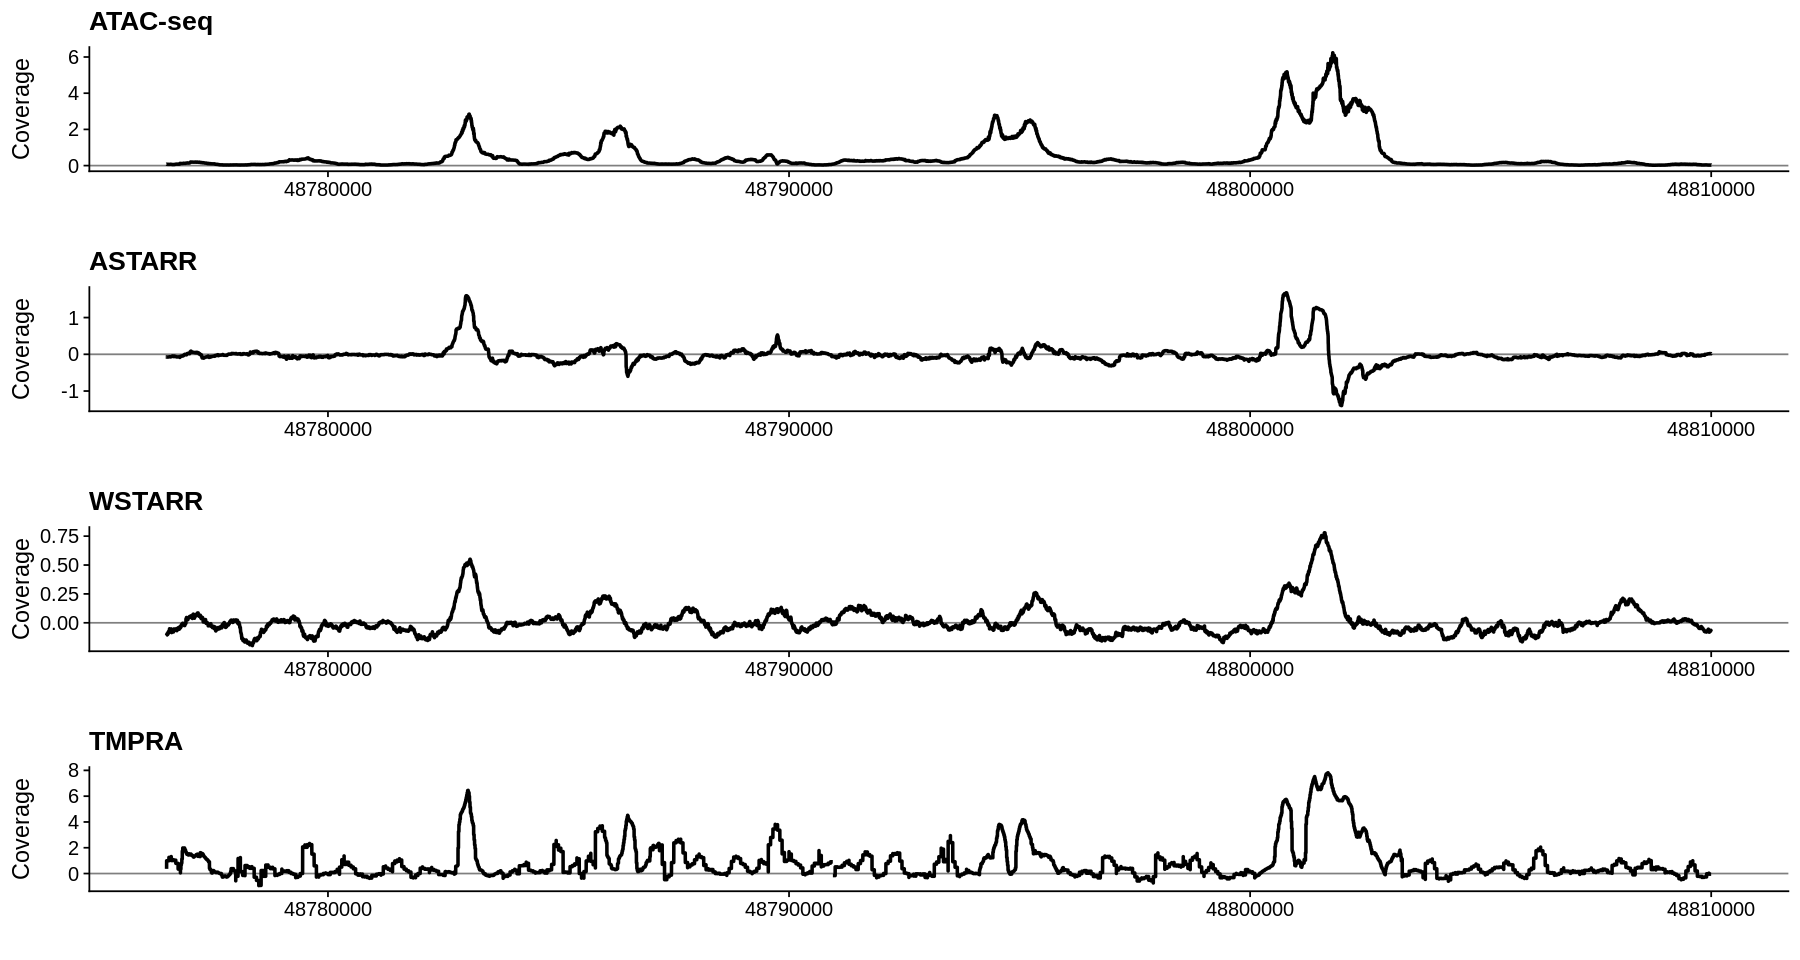

In [78]:
lst_gpt = lapply(names(lst_dat), function(idx){
    txt = idx
    dat = lst_dat[[idx]]
    gpt = ggplot() + 
        geom_hline(yintercept = 0, color="grey50") +    
        geom_line(data = dat, aes(x=Start, y=Coverage), linewidth=1) +
        labs(x="", title=txt) +
        theme_cowplot()
    return(gpt)
})

options(repr.plot.height=8, repr.plot.width=15)
plot_grid(plotlist = lst_gpt, align="v", ncol=1)

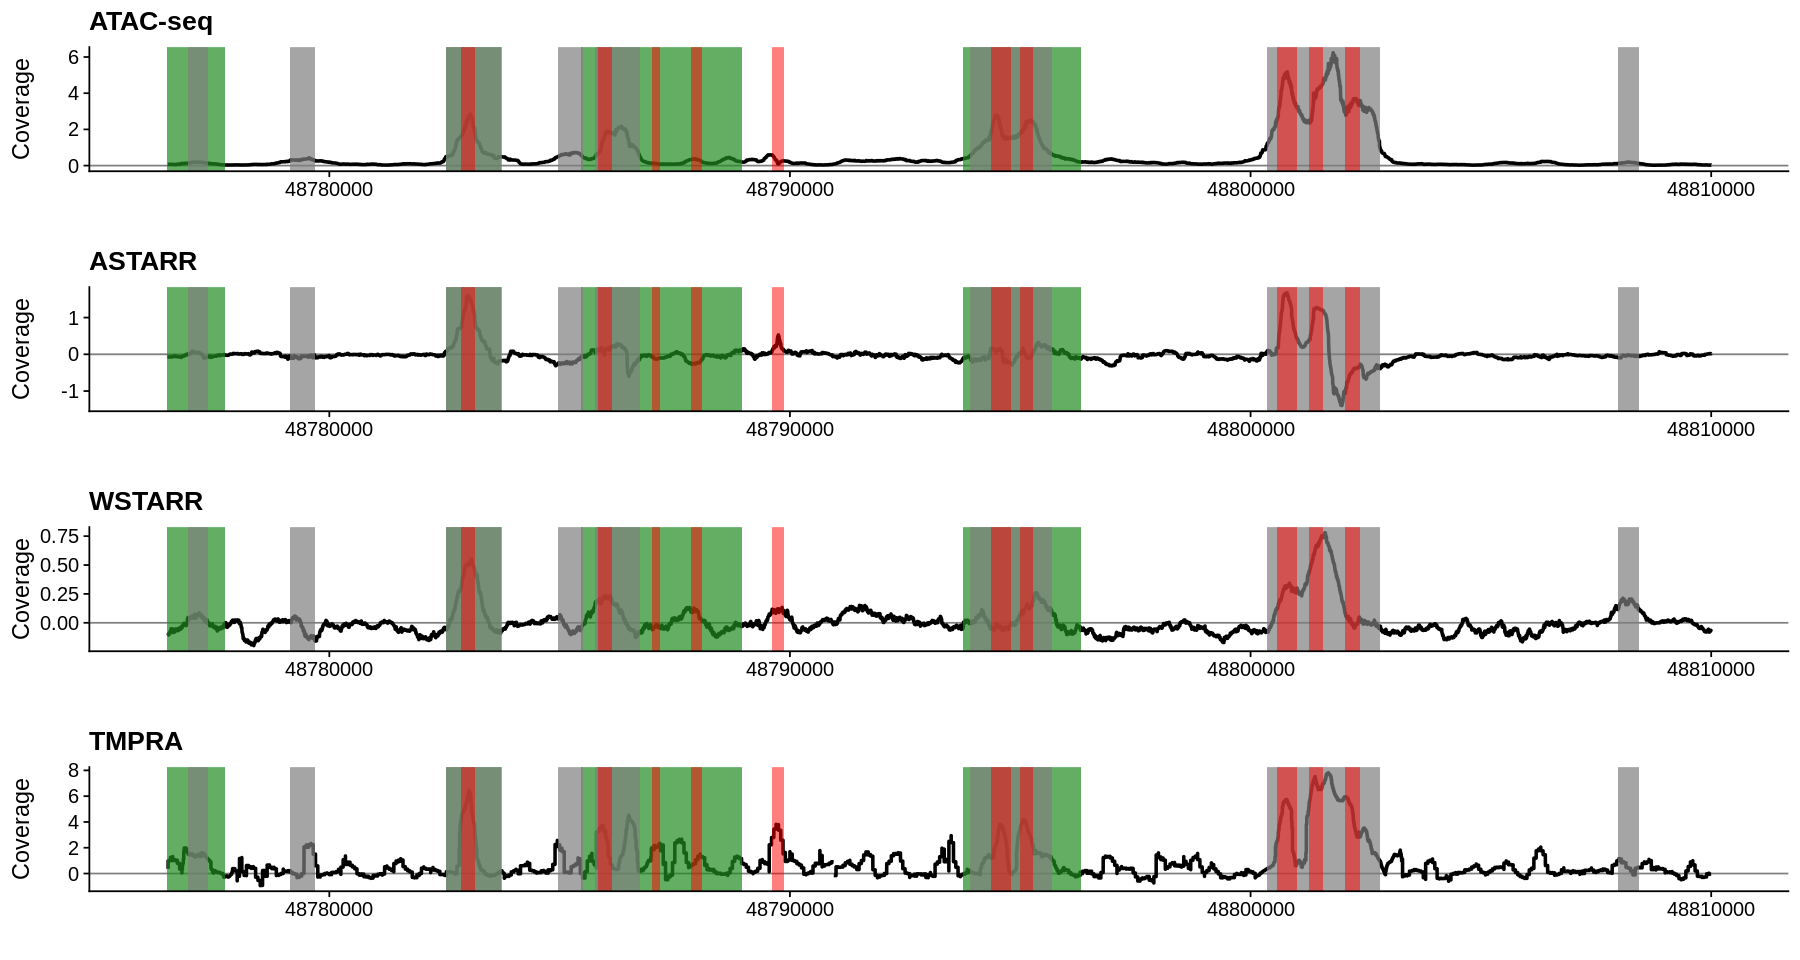

In [79]:
lst_gpt = lapply(names(lst_dat), function(idx){
    txt = idx
    dat = lst_dat[[idx]]
    gpt = ggplot() + 
        geom_hline(yintercept = 0, color="grey50") +    
        geom_line(data = dat, aes(x=Start, y=Coverage), linewidth=1) +
        labs(x="", title=txt) +
        theme_cowplot()
    
    gpt = gpt + geom_rect(
        data = dat_enh,
        aes(xmin=chromStart, xmax=chromEnd, ymin=-Inf, ymax=Inf),
        fill = "forest green",
        alpha=0.7)
    
    gpt = gpt + geom_rect(
        data = dat_reg,
        aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
        fill = "grey50",
        alpha=0.7)
    
    gpt = gpt + geom_rect(
        data = dat_ant,
        aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
        fill = "red",
        alpha=0.5)
    
    
    return(gpt)
})

options(repr.plot.height=8, repr.plot.width=15)
plot_grid(plotlist = lst_gpt, align="v", ncol=1)

## Plot for presentation

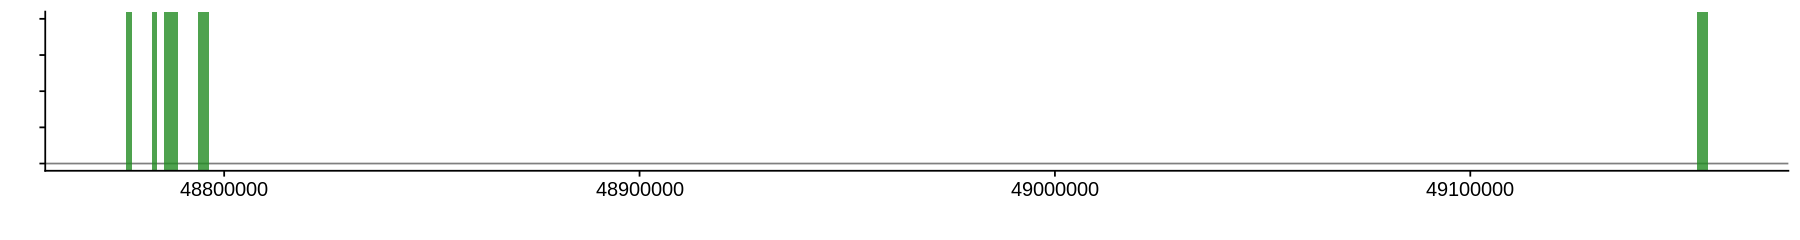

In [104]:
dat = dat_ghancer_int
dat = dat %>% dplyr::filter(geneName == "GATA1")

idx = dat$geneHancerIdentifier
dat = dat_ghancer_reg 
dat = dat %>% dplyr::filter(name %in% idx)

dat_enh = dat

gpt = ggplot() + 
    geom_hline(yintercept = 0, color="grey50") +    
    labs(x="", y="") +
    ylim(0, 1) +
    xlim(48776000, 49157500) +
    theme_cowplot() +
    theme(axis.text.y=element_blank())

gpt = gpt + geom_rect(
        data = dat_enh,
        aes(xmin=chromStart, xmax=chromEnd, ymin=-Inf, ymax=Inf),
        fill = "forest green",
        alpha=0.8)

options(repr.plot.height=2, repr.plot.width=15)
print(gpt)

In [99]:
range(c(dat_enh$chromStart, dat_enh$chromEnd))

[1] 48776467 49157200

chrX:48776000-49157500

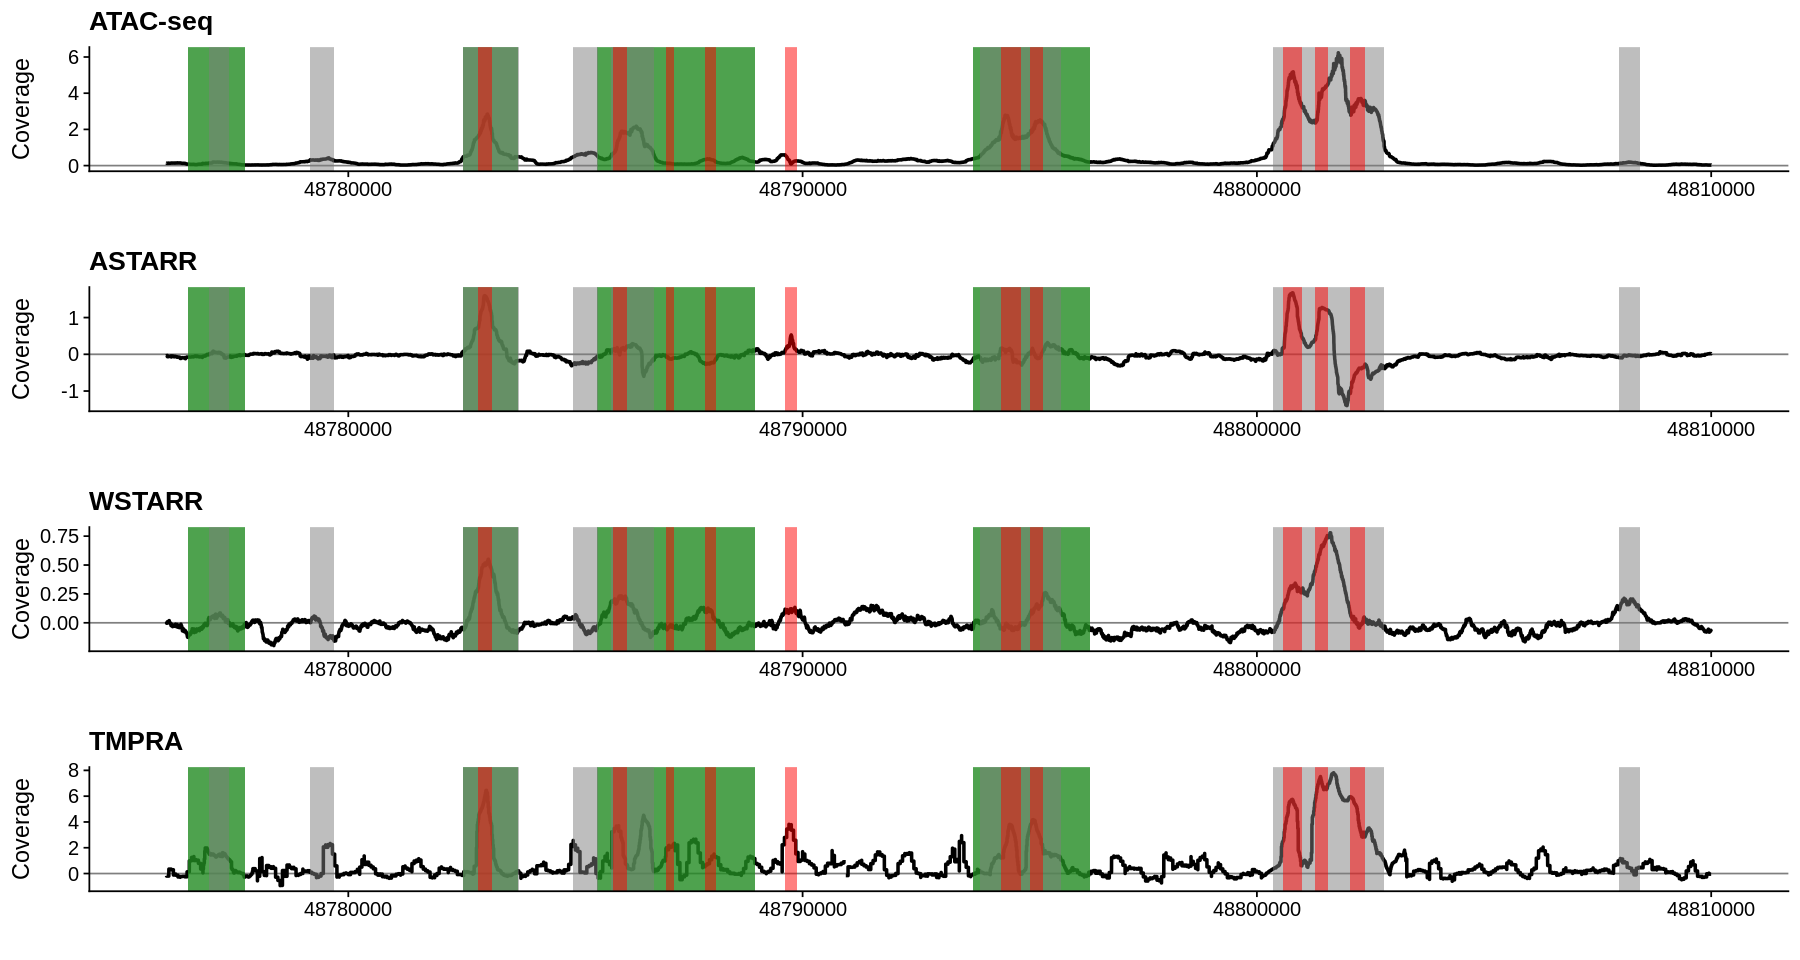

In [106]:
### chrX:48780000-48810000
CHROM = "chrX"
START = 48776000
END   = 48810000

###
dat_ant = dat_annot_gata1 %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END)

###
dat_reg = dat_region %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END)

###
dat = dat_ghancer_int
dat = dat %>% dplyr::filter(geneName == "GATA1")

idx = dat$geneHancerIdentifier
dat = dat_ghancer_reg 
dat = dat %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END,name %in% idx)

dat_enh = dat

###
lst_dat = list(
    "ATAC-seq" = dat_track_astarr %>% mutate(Coverage = Input),
    "ASTARR"   = dat_track_astarr %>% mutate(Coverage = pLog2FC),
    "WSTARR"   = dat_track_wstarr %>% mutate(Coverage = pLog2FC),
    "TMPRA"    = dat_track_tmpra  %>% mutate(Coverage =  Log2FC)
)

lst_dat = lapply(lst_dat, function(dat){
    dat = dat %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END)
    return(dat)
})

lst_gpt = lapply(names(lst_dat), function(idx){
    txt = idx
    dat = lst_dat[[idx]]
    gpt = ggplot() + 
        geom_hline(yintercept = 0, color="grey50") +    
        geom_line(data = dat, aes(x=Start, y=Coverage), linewidth=1) +
        labs(x="", title=txt) +
        theme_cowplot()
    
    gpt = gpt + geom_rect(
        data = dat_enh,
        aes(xmin=chromStart, xmax=chromEnd, ymin=-Inf, ymax=Inf),
        fill = "forest green",
        alpha=0.8)
    
    
    gpt = gpt + geom_rect(
        data = dat_reg,
        aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
        fill = "grey50",
        alpha=0.5)
    
    gpt = gpt + geom_rect(
        data = dat_ant,
        aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
        fill = "red",
        alpha=0.5)
    
    
    return(gpt)
})

options(repr.plot.height=8, repr.plot.width=15)
plot_grid(plotlist = lst_gpt, align="v", ncol=1)

In [107]:
lapply(lst_dat, function(dat){
    return(range(na.omit(dat$Coverage)))
})

$`ATAC-seq`
[1] 0.01945138 6.23499841

$ASTARR
[1] -1.396389  1.675530

$WSTARR
[1] -0.1971588  0.7791729

$TMPRA
[1] -0.9363561  7.8164107

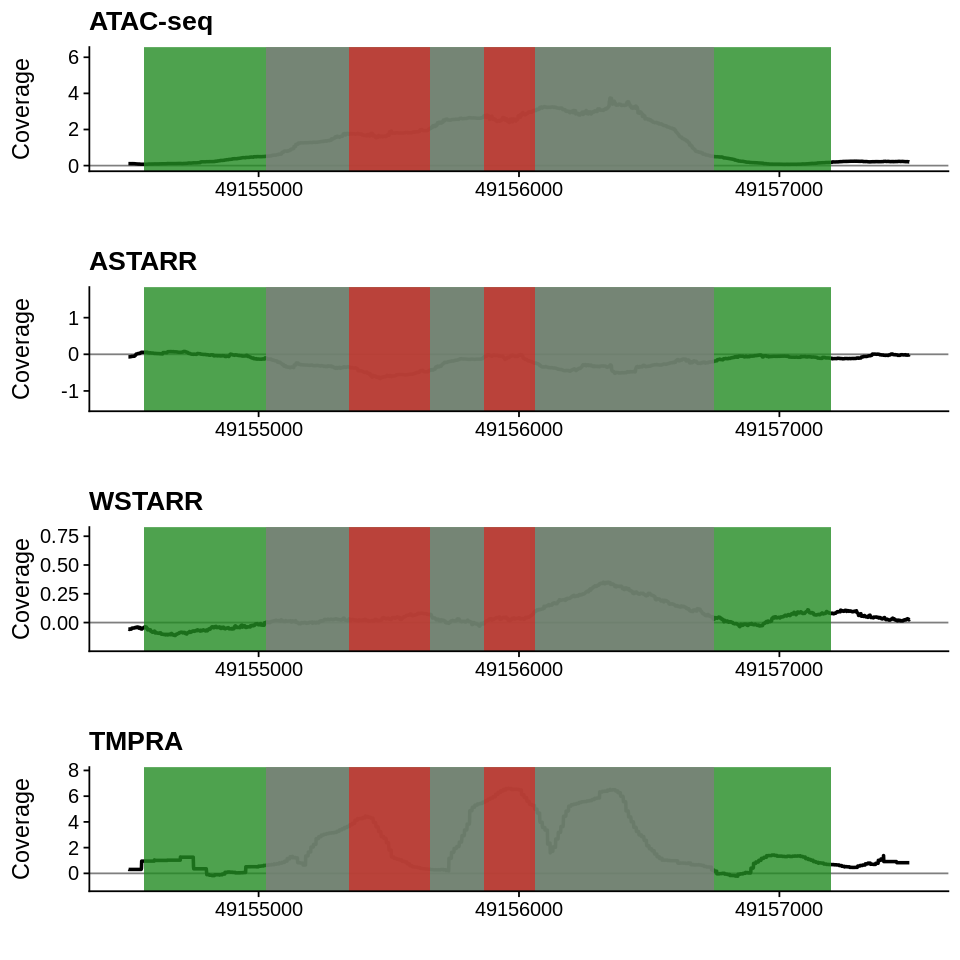

In [109]:
### 49155029 - 49156747
CHROM = "chrX"
START = 49154500
END   = 49157500

###
dat_ant = dat_annot_gata1 %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END)

###
dat_reg = dat_region %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END)

###
dat = dat_ghancer_int
dat = dat %>% dplyr::filter(geneName == "GATA1")

idx = dat$geneHancerIdentifier
dat = dat_ghancer_reg 
dat = dat %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END,name %in% idx)

dat_enh = dat

###
lst_dat = list(
    "ATAC-seq" = dat_track_astarr %>% mutate(Coverage = Input),
    "ASTARR"   = dat_track_astarr %>% mutate(Coverage = pLog2FC),
    "WSTARR"   = dat_track_wstarr %>% mutate(Coverage = pLog2FC),
    "TMPRA"    = dat_track_tmpra  %>% mutate(Coverage =  Log2FC)
)

lst_dat = lapply(lst_dat, function(dat){
    dat = dat %>% dplyr::filter(Chrom == CHROM, Start >= START, End <= END)
    return(dat)
})

lst_gpt = lapply(names(lst_dat), function(idx){
    txt = idx
    dat = lst_dat[[idx]]
    gpt = ggplot() + 
        geom_hline(yintercept = 0, color="grey50") +    
        geom_line(data = dat, aes(x=Start, y=Coverage), linewidth=1) +
        labs(x="", title=txt) +
        theme_cowplot()
    
    gpt = gpt + geom_rect(
        data = dat_enh,
        aes(xmin=chromStart, xmax=chromEnd, ymin=-Inf, ymax=Inf),
        fill = "forest green",
        alpha=0.8)
    
    
    gpt = gpt + geom_rect(
        data = dat_reg,
        aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
        fill = "grey50",
        alpha=0.8)
    
    gpt = gpt + geom_rect(
        data = dat_ant,
        aes(xmin=Start, xmax=End, ymin=-Inf, ymax=Inf),
        fill = "red",
        alpha=0.5)
    
    return(gpt)
})

lst_gpt[[1]] = lst_gpt[[1]] + ylim(0, 6.25)
lst_gpt[[2]] = lst_gpt[[2]] + ylim(-1.40, 1.68)
lst_gpt[[3]] = lst_gpt[[3]] + ylim(-0.20, 0.78)
lst_gpt[[4]] = lst_gpt[[4]] + ylim(-0.95, 7.82)

options(repr.plot.height=8, repr.plot.width=8)
plot_grid(plotlist = lst_gpt, align="v", ncol=1)